In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [23]:
from google.colab import drive
from sklearn.impute import SimpleImputer

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Assignments/CarPrice_Assignment.csv'
df = pd.read_csv(file_path, delimiter=',', skiprows=[1])
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       2          3       alfa-romero stelvio      gas        std        two   
1       3          1  alfa-romero Quadrifoglio      gas        std        two   
2       4          2               audi 100 ls      gas        std       four   
3       5          2                audi 100ls      gas        std       four   
4       6          2                  audi fox      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1    hatchback        rwd          front       94.5  ...         152   
2        sedan        fwd          front       99.8  ...         109   
3        sedan        4wd          front       99.4  ...         136   
4        sedan        fw

In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            204 non-null    int64  
 1   symboling         204 non-null    int64  
 2   CarName           204 non-null    object 
 3   fueltype          204 non-null    object 
 4   aspiration        204 non-null    object 
 5   doornumber        204 non-null    object 
 6   carbody           204 non-null    object 
 7   drivewheel        204 non-null    object 
 8   enginelocation    204 non-null    object 
 9   wheelbase         204 non-null    float64
 10  carlength         204 non-null    float64
 11  carwidth          204 non-null    float64
 12  carheight         204 non-null    float64
 13  curbweight        204 non-null    int64  
 14  enginetype        204 non-null    object 
 15  cylindernumber    204 non-null    object 
 16  enginesize        204 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,103.500000,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329069,3.258235,10.148137,104.083333,5125.735294,25.240196,30.769608,13275.640525
std,59.033889,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.271331,0.311751,3.981000,39.638488,478.077996,6.551513,6.898337,8008.490408
min,2.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.750000,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,103.500000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,154.250000,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16506.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
df = df.drop(['car_ID', 'symboling'], axis=1)

In [26]:
df = pd.get_dummies(df, drop_first=True)

In [27]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    if name == "Support Vector Regressor":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,MAE
Linear Regression,0.651849,3.160716e+07,3127.982448
Decision Tree,0.824872,1.589910e+07,2535.353659
Random Forest,0.842429,1.430521e+07,2458.453333
Gradient Boosting,0.868049,1.197926e+07,2303.033697
Support Vector Regressor,-0.343084,1.219329e+08,7280.451289


In [30]:
results_df.sort_values("R2 Score", ascending=False)

,R2 Score,MSE,MAE
Gradient Boosting,0.868049,1.197926e+07,2303.033697
Random Forest,0.842429,1.430521e+07,2458.453333
Decision Tree,0.824872,1.589910e+07,2535.353659
Linear Regression,0.651849,3.160716e+07,3127.982448
Support Vector Regressor,-0.343084,1.219329e+08,7280.451289


**Interpretation:**

First best model is **Gradient Boosting** and second best is **Random Forest**.

In [31]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15)

,0
enginesize,0.549650
curbweight,0.188970
highwaympg,0.153706
horsepower,0.019940
carwidth,0.014594
citympg,0.011071
peakrpm,0.007559
wheelbase,0.007377
carlength,0.006543
boreratio,0.006029


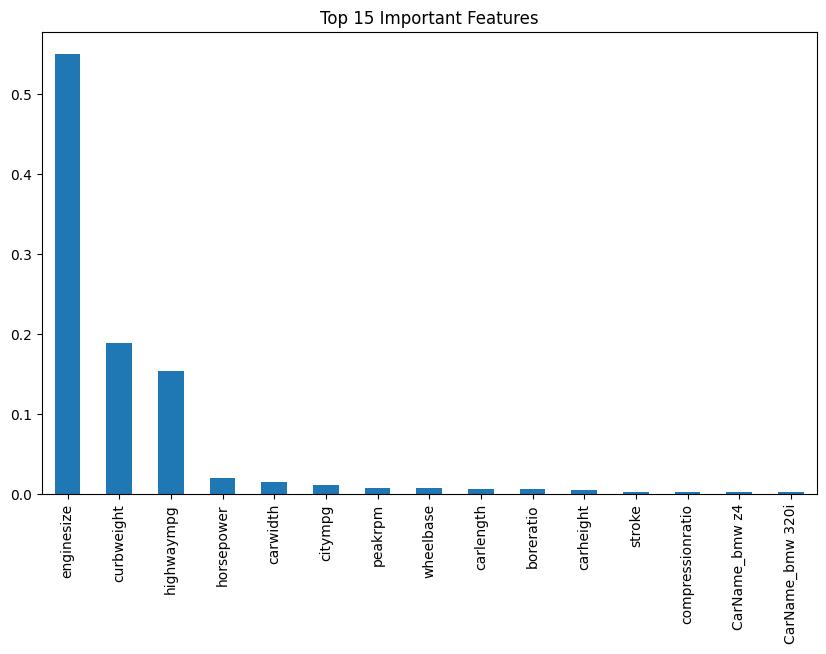

In [32]:
plt.figure(figsize=(10,6))
importances.sort_values(ascending=False)[:15].plot(kind='bar')
plt.title("Top 15 Important Features")
plt.show()

In [33]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 12],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=3,
                    scoring='r2',
                    n_jobs=-1)

grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}

In [34]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.8471483298854792
MSE: 13876755.04152579
MAE: 2426.7446622399657
